In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import ipywidgets as widgets
from IPython.display import display, Markdown, HTML

## Შემთხვევითი (პირობითი) ცვლადები


Ალბათობების და შესაძლო ხდომილებების ანალიზში ძალიან მნიშვნელოვანია ე.წ. “Შემთხვევითი ცვლადების” ცნება და მათი ანალიზი.ცხადია, მათემატიკურად, შემთხვევითი მოვლენებს რიცხვებით ავსახავთ:



ე.ი. შემთხვევითი ცვლადი ეს არის შემთხვევითი მოვლენა გადატანილი რიცხვებში. Მაგ, :მონეტა თუ საფასურზე დაეცემა, შემთხვევით ცვლადს, X-ს, მივანიჭოთ მნიშვნელობა 1, ხოლო თუ გერბზე, X = 0.
Პირობითი ცვლადი შეიძლება იყოს დისკრეტულიც და უწყვეტიც - დისკრეტული ცვლადი იქნება მონაცემი, რომელსაც რაღაც კონკრეტული მნიშვნელობა შეესაბამება. Უწყვეტი პირობითი ცვლადის მნიშვნელობა კი არ არის ზუსტად განსაზღვრული, და უსასრულო მნიშვნელობების რაოდენობა აქვს. Რა თქმა უნდა, მონეტის აგდების შედეგს თუ მივუსადაგებთ პირობით ცვლადს, X  იქნება დისკრეტული პირობითი ცვლადი

In [ ]:
# Interactive coin flip simulation
def flip_coin(n_flips):
    return np.random.choice([0, 1], size=n_flips)

@widgets.interact(n_flips=widgets.IntSlider(min=1, max=1000, step=1, value=100))
def coin_flip_simulation(n_flips):
    results = flip_coin(n_flips)
    heads = np.sum(results)
    tails = n_flips - heads

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    ax1.bar(['Heads', 'Tails'], [heads, tails])
    ax1.set_title('Coin Flip Results')
    ax1.set_ylabel('Count')

    ax2.pie([heads, tails], labels=['Heads', 'Tails'], autopct='%1.1f%%')
    ax2.set_title('Proportion of Heads and Tails')

    plt.tight_layout()
    plt.show()

    print(f"Heads: {heads}, Tails: {tails}")
    print(f"Proportion of Heads: {heads/n_flips:.2f}")


interactive(children=(IntSlider(value=100, description='n_flips', max=1000, min=1), Output()), _dom_classes=('…

მოდი, X იყოს  “სამართლიანი მონეტის” 3 ჯერ აგდებისას მოსულ საფასურთა რაოდენობა.

აღვწეროთ ყველა შესაძლო შედეგი და, შესაბამისად, X-ისთვის სხვადასხვა მნიშვნელობის მიღების ალბათობები:

Სსს   გგს   
Სსგ	  გსგ  
Სგს	  სგგ
Გსს   გგგ


P(x=0) = ⅛

P(x=1) = 1/8

P(x=3) = 1/8



გამოვსახოთ ეს მნიშვნელობები საკოორდინატო სიბრტყეზე:


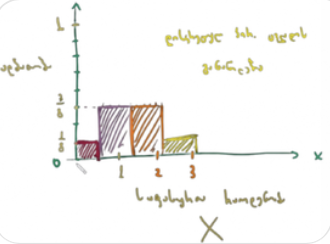

### Შემთხვევითი (პირობითი) ცვლადების განაწილება

როგორი ფორმა ექნება მრუდს, რომელიც "ედება" X-ის განაწილების მნიშვნელობებს?

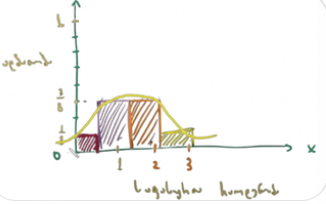

### ძველმა სტატისტიკოსებმა შენიშნეს, რომ ერთი და იგივე ფორმა ხშირად ხვდებოდათ სხვადასხვა განაწილებაში —ასე რომ, მას უწოდეს ნორმალური განაწილება (იგივე გაუსის განაწილება)



In [ ]:
# Interactive normal distribution plot
@widgets.interact(mean=widgets.FloatSlider(min=-5, max=5, step=0.1, value=0),
                  std=widgets.FloatSlider(min=0.1, max=5, step=0.1, value=1))
def plot_normal_distribution(mean, std):
    x = np.linspace(mean - 4*std, mean + 4*std, 100)
    y = stats.norm.pdf(x, mean, std)

    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(x, y)
    ax.fill_between(x, y, alpha=0.3)
    ax.set_title(f'Normal Distribution (μ={mean}, σ={std})')
    ax.set_xlabel('X')
    ax.set_ylabel('Probability Density')

    plt.show()

interactive(children=(FloatSlider(value=0.0, description='mean', max=5.0, min=-5.0), FloatSlider(value=1.0, de…

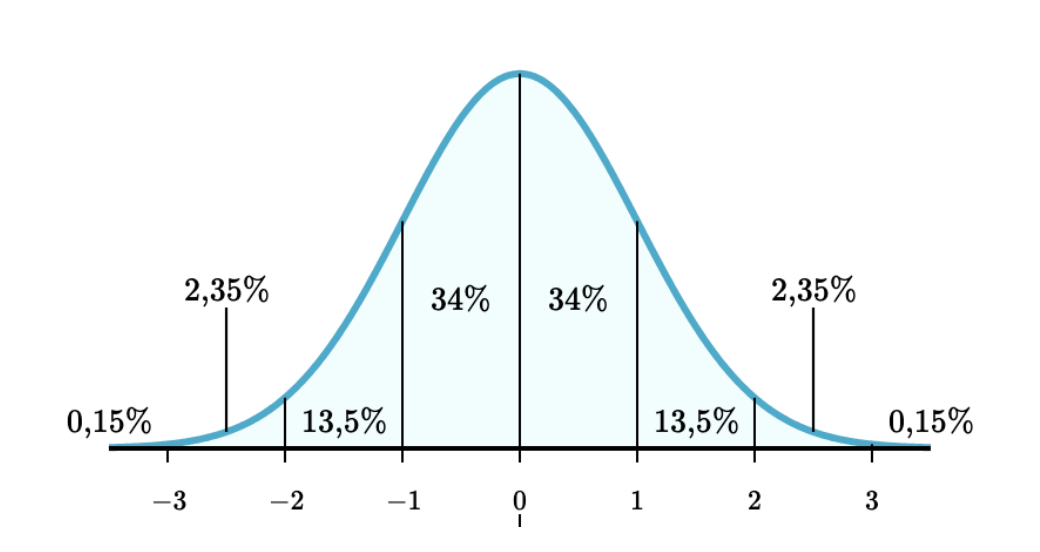

 1718 წელს ლონდონში გამოვიდა ფრანგი მათემატიკოსის, მუავრის წიგნი სახელწოდებით "სწავლება შემთხვევითობაზე". მან გაზომა 1375 შემთხვევით შერჩეული ქალის სიმაღლე, და მიიღო ასეთი შედეგები:


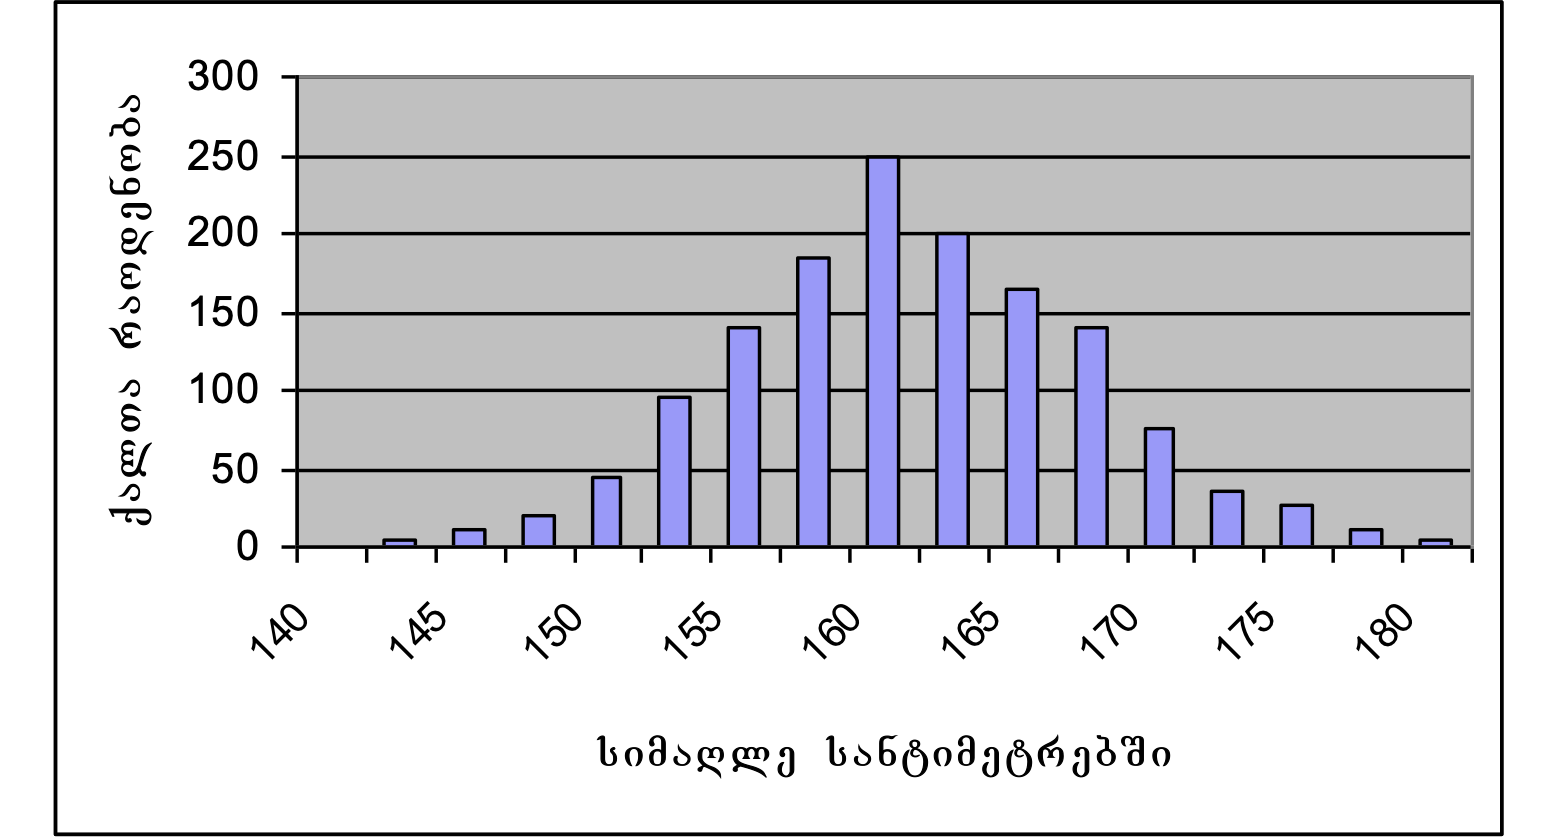

წირი, რომელიც ედება სიმაღლეთა განაწილების ამ დიაგრამას, ძალიან გავს


ფუნქციის გრაფიკს

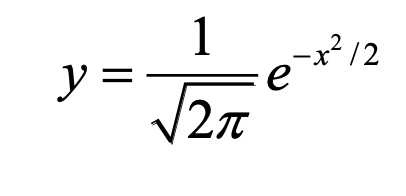

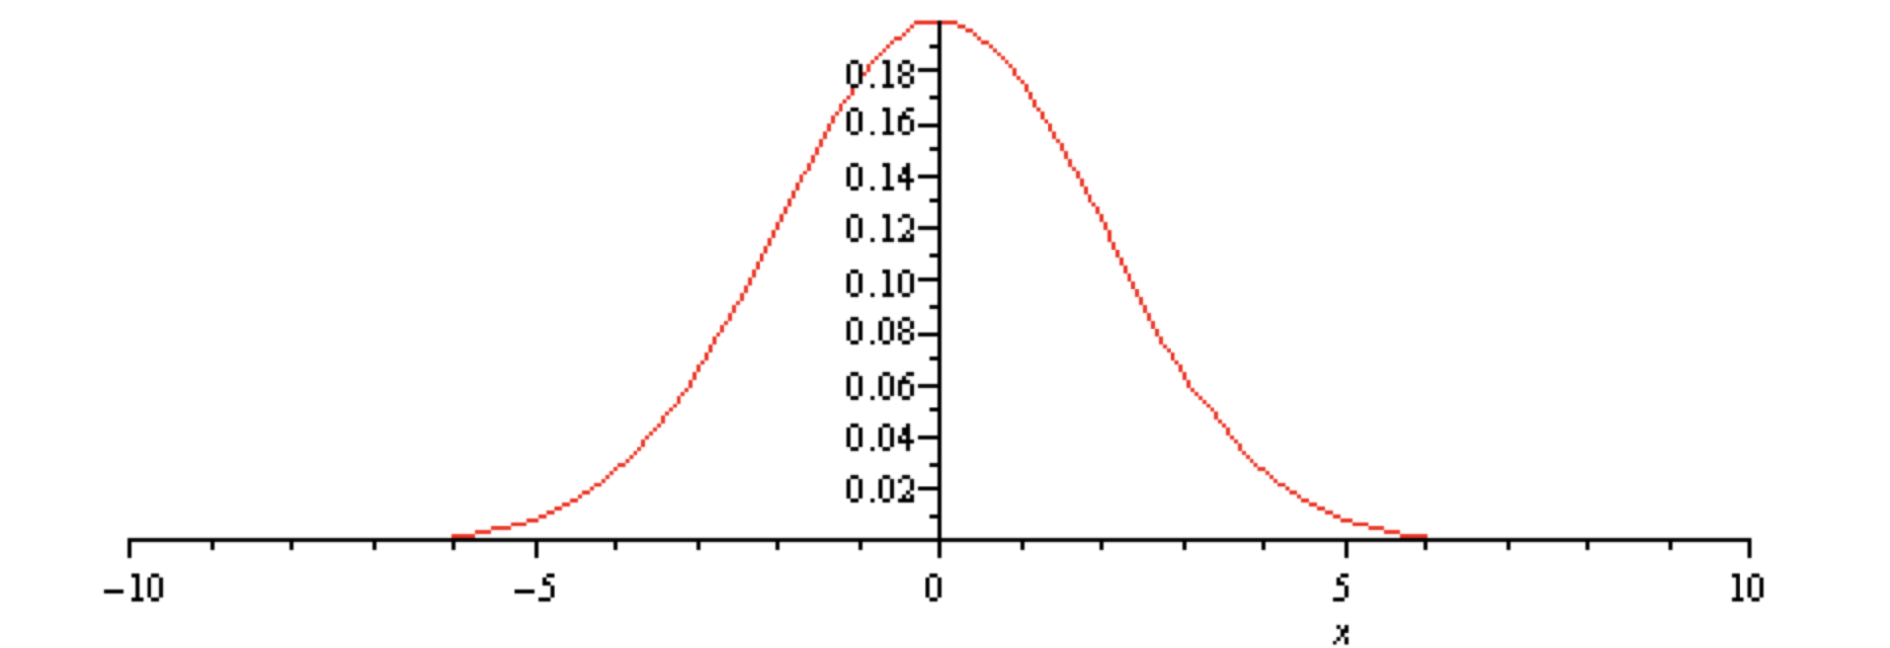



ეს დაკვირვება დაედო საფუძვლად ე.წ. "ნორმალური განაწილების კანონს", სწორედ ამ კანონითაა განაწილებული უამრავი ფიზიკური და ბიოლოგიური ბუნების მქონე შემთხვევითი სიდიდე.  **ცენტრალური ზღვრული თეორემის წყალობით,** ნორმალური განაწილება ხშირად არის შესაფერისი მიახლოება, მაშინაც კი, როდესაც ცნობილია, რომ საწყისი განაწილება არ არის ნორმალური. ეს მოსახერხებელია, რადგან ნორმალური განაწილებით შეფასებების მიღება ადვილია: ნორმალური განაწილებით მოდელირებული მონაცემების 68% მდებარეობს საშუალოსგან 1 სტანდარტული გადახრის ფარგლებში, 95% - 2 სტანდარტული გადახრის ფარგლებში და 99.7% - 3 სტანდარტული გადახრის ფარგლებში. აშკარა მიზეზების გამო, ემპირიული წესი ასევე ზოგჯერ ცნობილია როგორც 68-95-99.7 წესი.

აქ შეგიძლიათ დეტალურად გაეცნოთ, როგორ შეგვიძლია მონაცემების სტატისტიკური ანალიზი ცენტრალურ ზღვრული თეორემის და ნორმალური განაწილების კანონის გამოყენებით:  https://brilliant.org/wiki/normal-distribution/

# PMF & CDF

Ალბათობასა და სტატისტიკაში არსებობს სხვადასხვა ინსტრუმენტები და მეთოდები, რომლებიც დაგვეხმარება შემთხვევითი ცვლადების უკეთეს ანალიზში, შესაძლო ხდომილებების ვიზუალიზაციასა და პროგნოზების გაკეთებაში. Არსებობს 2 ძირითადი მიდგომა, გნებავთ “ფუნქცია”, შემთხვევითი ცვლადების გასაანალიზებლად:

### PMF (probability mass function) & CDF(cumulative distribution function)

Ამ ფუნქციებმა კომპლექსურ ამოცანებში
 შესაძლოა ძალიან “საშიში” და ვრცელი
მათემატიკური ჩანაწერების სახე
მიიღონ, მაგრამ მთავარია,
 გვესმოდეს შინაარსი და მიზნობრიობა
 თითოეული მათგანის უკან


In [ ]:
# Interactive PMF and CDF for binomial distribution
@widgets.interact(n=widgets.IntSlider(min=1, max=20, step=1, value=10),
                  p=widgets.FloatSlider(min=0, max=1, step=0.01, value=0.5))
def plot_pmf_cdf(n, p):
    x = np.arange(0, n+1)
    pmf = stats.binom.pmf(x, n, p)
    cdf = stats.binom.cdf(x, n, p)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    ax1.bar(x, pmf)
    ax1.set_title(f'PMF of Binomial Distribution (n={n}, p={p:.2f})')
    ax1.set_xlabel('Number of Successes')
    ax1.set_ylabel('Probability')

    ax2.step(x, cdf, where='post')
    ax2.set_title(f'CDF of Binomial Distribution (n={n}, p={p:.2f})')
    ax2.set_xlabel('Number of Successes')
    ax2.set_ylabel('Cumulative Probability')

    plt.tight_layout()
    plt.show()


interactive(children=(IntSlider(value=10, description='n', max=20, min=1), FloatSlider(value=0.5, description=…

### PMF - Probability Mass Function:
ყველა მოვლენის შესაძლო ალბათობა

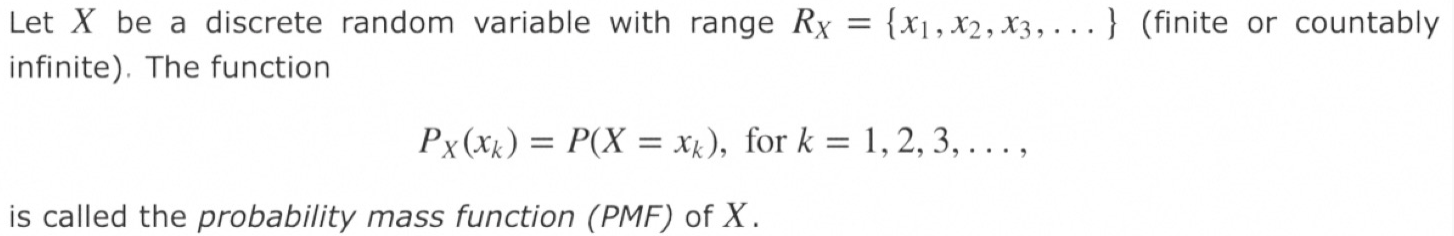

Ვთქვათ, ავაგდეთ მონეტა ორჯერ, და X იყოს რაოდენობა ამოსული “გერბების”.

X-ის შესაძლო მნიშვნელობებია 0,1,2


Ანუ ჩვენი PMF არის:


PX(k)=P(X=k) for k=0,1,2.



P(0) = ¼   
P(1) = ½  
P(2) = ¼  


დისკრეტული შემთხვევითი ცვლადებისთვის PMF-ს ასევე უწოდებენ ალბათობის განაწილებას


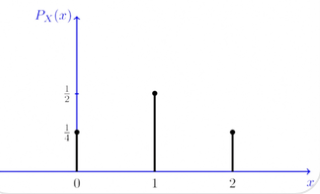

Როდესაც გვთხოვენ ვიპოვოთ დისკრეტული შემთხვევითი ცვლადის ალბათობის განაწილება ჩვენ შეგვიძლია, დავითვალოთ PMF.

Თუმცა, PMF	 არ არის ერთადერთი საშუალება შემთხვევითი სიტუაციების ანალიზისთვის

# CDF - Cumulative Distribution Function

PMF-ისგან განსხვავებით, რომელიც ყველა შესაძლო მნიშვნელობის მიღების ალბათობას აღწერს, CDF აღწერს ალბათობას, რომ შემთხვევითი ცვლადი X მიიღებს მნიშვნელობას, რომელიც ნაკლებია ან ტოლია x-ზე.

მაგალითისთვის შეგვიძლია ავიღოთ ასეთი ამოცანა:

ნიუ იორკის აეროპორტში ქაოსის შესაქმნელად საკმარისია ფრენების 25 % გადაიდოს/გაუქმდეს.
Გვაქვს 1017 დღის მონაცამები თებერვლის თვის, რომელთაგან 8 დღეს იყო 25 % იანი შეფერხება ფრენებში - ამ მონაცემების მიხედვით 25 %პროცენტიანი შეფერხების ალბათობა 8/1017 გამოდის, რაც დაახლოებით 0.8 % - ია
, რაც წესით, თამამად შეგვიძლია დავაიგნოროთ.


თუმცა, Რა თქმა უნდა, ჩვენ ის შემთხვევებიც გვაინტერესებს, როცა პრობლემა რეისების 25 პროცენტზე მეტს შეექმნა -

Ეს იქნებოდა ჩვენი PMF ამ ამოცანისთვის - რომელიც გვიჩვენებს სხვადასხვა პროცენტიანი შეფერხებების პროცენტულ განაწილებას, ანუ ამა თუ იმ პროცენტიანი შეფერხების ალბათობებს.

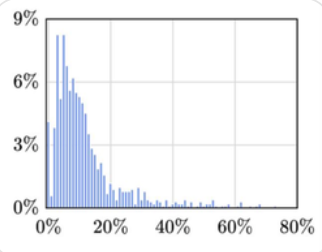


Რა არის ის არეალი, რომელიც გვიჩვენებს მშვიდობიანი (უპრობლემო) დღის ალბათობას აეროპორტში?


ყველა ისეთი შემთხვევა, როდესაც 25 %ზე ნაკლებიანი შეფერხება გვქონდა ფრენებში

Ანუ, უნდა შევკრიბოთ ფუნქციის მნიშვნელობები 0 % დან 24 % ის ჩათვლით - y ღერძის მნიშვნელობები, რაც წარმოადგენს პროცენტულ განაწილებას.

Გამოდის, რომ 89 % ია იმის ალბათობა, რომ ქაოსი არ დაისადგურებს

Ესეც ჩვენი ახალი საშუალება მონაცემების ანალიზისთვის, რომელიც ამ წამს გამოვიყენეთ :

CDF
(P X <= x)

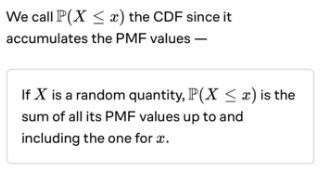


Ისევ მონეტის აგდების მაგალითზე, ახლა დავითვალოთ არა PMF, არამედ CDF ორ აგდებაში ამოსული გერბების რაოდენობა X სთვის. (Შესაძლო მნიშვნელობები ისევ 0,1,2)

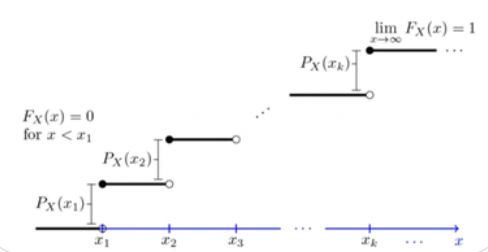

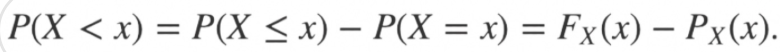

## PMF VS CDF

(PMF) გამოყენება უფრო უპრიანია, როდესაც გვაინტერესებს შემთხვევითი ცვლადის მიღების კონკრეტული მნიშვნელობის ალბათობა.

კუმულაციური განაწილების ფუნქცია (CDF) კი უფრო მოსახერხებელია, როდესაც გვინდა, გავიგოთ ალბათობა იმისა, რომ შემთხვევითი ცვლადი ნაკლებია ან ტოლია კონკრ მნიშვნელობაზე. CDF განსაკუთრებით გამოსადეგი იქნება როგორც დისკრეტული, ასევე უწყვეტი შემთხვევითი ცვლადებისთვის.

საბოლოო ჯამში, ორივე კონცეფცია მნიშვნელოვანია სტატისტიკური ანალიზისა და ალბათობის თეორიისთვის, და მათი გამოყენება დამოკიდებულია კონკრეტულ მიზანსა და კითხვაზე, რომელსაც ვსვამთ მონაცემების შესახებ.